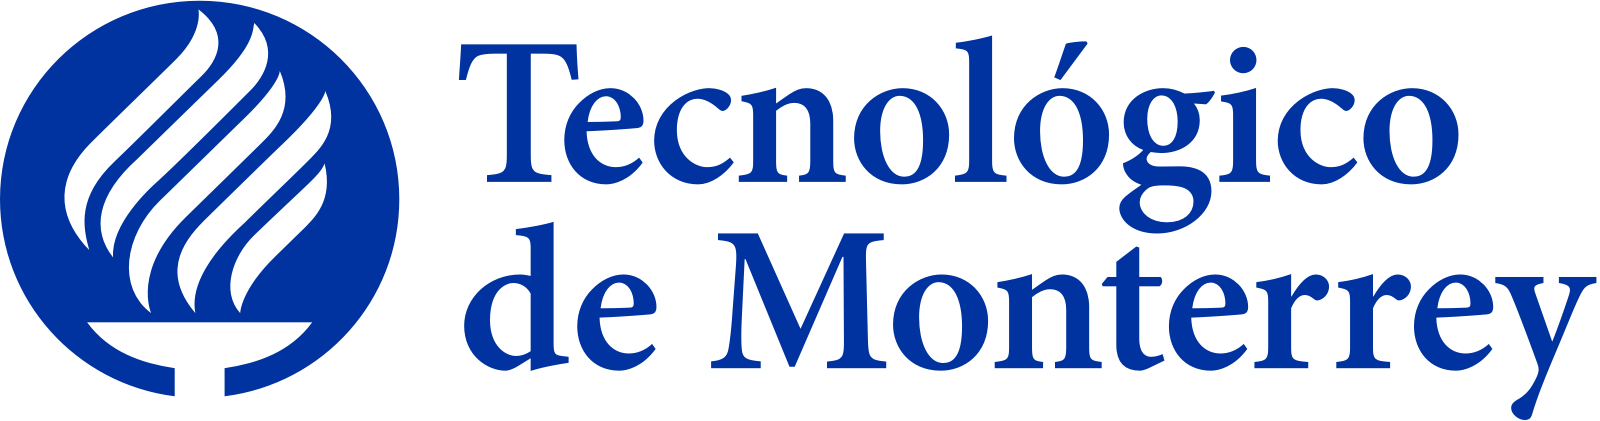

---
# Instituto Tecnológico y de Estudios Superiores de Monterrey


## **Capstone Project (Team #49)**


### **Stage 1.** Exploratory Data Analysis


#### *Author:* Julia Gabriela Pinedo -- A01795315

#### *Professor:* Dr. Grettel Barceló Alonso
#### *Project Advisor:* Dr. Guillermo Mota Medina

---

## Table of Contents
1. [Introduction](#introduction)
2. [EDA](#eda)
3. [Conclusion](#conclusion)
4. [References](#references)

---

# Introduction <a class="anchor" id="introduction" ></a>

To initiate the exploratory analysis of our Reinforcement Learning environment, a synthetic dataset was generated directly from the Gazebo simulation of the box-pushing scenario (**Figure 1**).

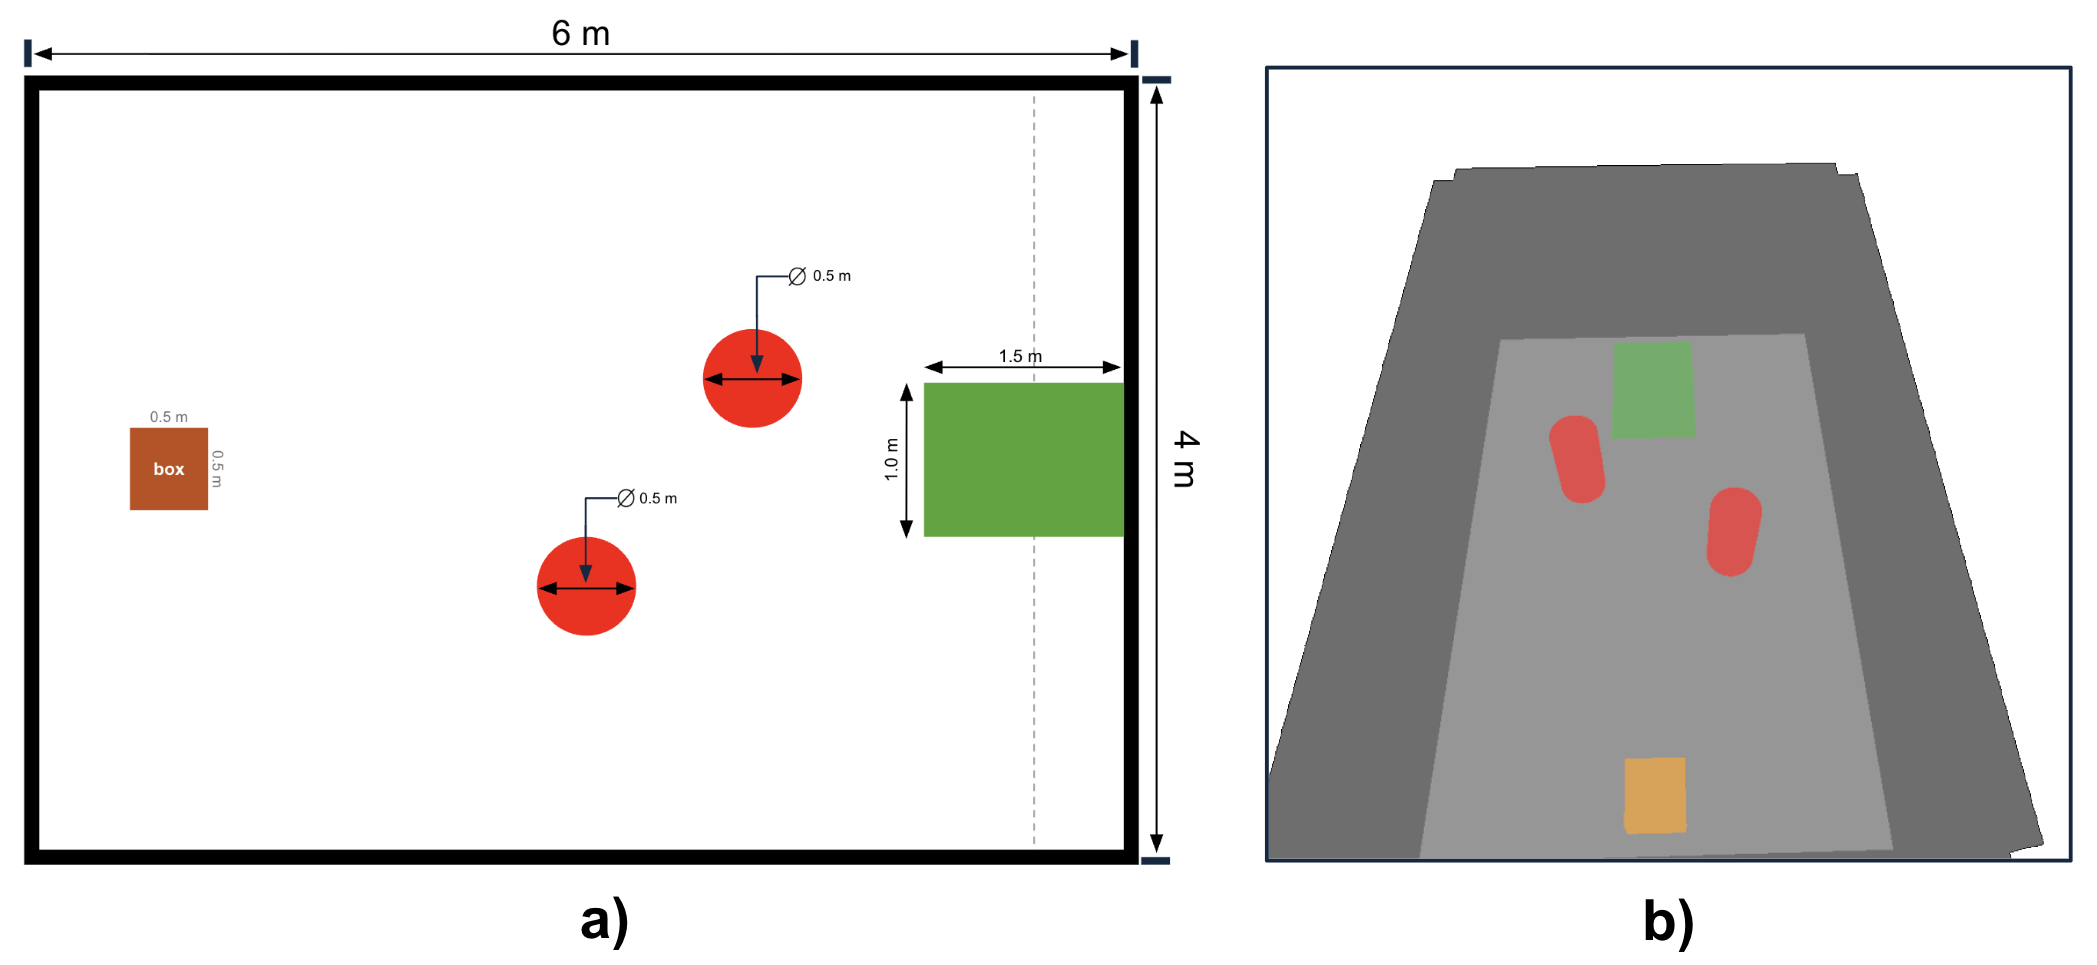
**Figure 1.** Simulation environment. a) Diagram of the arena, b) Arena modeled and simulated in Gazebo.

As previously stated in **Stage 0** of the project, the setup consists of a differential-drive robot equipped with odometry, an IMU, and a contact sensor, operating inside a bounded arena with two cylindrical obstacles, a pushable box, and a defined goal region. However, since no pre-existing dataset is available due to the nature of the problem, a simulation was conducted in order to retrieve data. The simulation consisted of **10 episodes of interaction**, each containing **200 steps with a time resolution of 0.1 seconds**. The objective was to obtain representative trajectories of the robot that captured: 

- sensor readings,
- distances to obstacles and goal region,
- event flags (*such as wall collisions or box contact*).

This dataset should be understood as a diagnostic sample, not as training input. It serves to verify that the environment generates realistic variables, to identify their ranges, distributions, and anomalies, and to decide how they will be preprocessed later. Conducting **Exploratory Data Analysis (EDA)** will allow us to visualize temporal patterns in the robot's trajectories. These insights will clarify which variables are most informative and robust for defining the state representation of the agent.

# EDA <a class="anchor" id="eda" ></a>

## Global Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

## Importing the Dataset

In [2]:
df = pd.read_csv('sim_dataset.csv')
df

,episode,t,x,y,yaw,v,omega,wheel_left_rad_s,wheel_right_rad_s,imu_gyro_z,...,dist_cyl_lower,dist_walls,dist_box,contact_box,collision_wall,goal_x,goal_y,box_x,box_y,episode_success
0,0,0.0,-2.769985,0.000000,0.014937,0.300154,0.149373,3.245511,4.072032,0.143890,...,2.537260,2.300154e-01,0.319985,0.0,0.0,2.15,0.0,-2.2,0.0,1
1,0,0.1,-2.732737,0.000556,0.046898,0.372518,0.319607,3.991428,5.454720,0.326745,...,2.501762,2.672630e-01,0.282737,0.0,0.0,2.15,0.0,-2.2,0.0,1
2,0,0.2,-2.707904,0.001722,-0.001598,0.248606,-0.484965,4.162068,2.138684,-0.521800,...,2.478355,2.920962e-01,0.257904,NaN,0.0,2.15,0.0,-2.2,0.0,1
3,0,0.3,-2.672207,0.001665,-0.028272,0.356966,-0.266733,4.816512,3.750175,-0.264467,...,2.444238,3.277928e-01,0.222207,0.0,0.0,2.15,0.0,-2.2,0.0,1
4,0,0.4,-2.624784,0.000324,0.002611,0.474418,0.308828,5.306022,6.322172,0.297156,...,2.398595,3.752157e-01,0.174784,0.0,0.0,2.15,0.0,-2.2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9,19.5,1.632622,-1.999999,-0.539329,0.237024,-0.747470,4.190813,1.618835,-0.770139,...,1.857600,1.000000e-06,3.987189,0.0,1.0,2.15,0.0,-2.2,0.0,0
1996,9,19.6,1.654587,-1.999999,-0.630224,0.255984,-0.908948,5.176325,1.171203,-0.942938,...,1.875694,1.000000e-06,4.006937,0.0,1.0,2.15,0.0,-2.2,0.0,0
1997,9,19.7,1.659016,-1.999999,-0.728478,0.054819,-0.982535,2.796704,-1.450424,-0.995288,...,1.879351,1.000000e-06,4.010922,0.0,1.0,2.15,0.0,-2.2,0.0,0
1998,9,19.8,1.674628,-1.999999,-0.712384,0.209223,0.160937,1.928130,3.229645,0.195623,...,1.892266,1.000000e-06,4.024975,0.0,1.0,2.15,0.0,-2.2,0.0,0


## Summary

In [3]:
summary = df.describe(include="all").transpose()
summary.head(15)

,count,mean,std,min,25%,50%,75%,max
episode,2000.0,4.500000,2.873000,0.000000,2.000000,4.500000,7.000000,9.000000
t,2000.0,9.950000,5.774874,0.000000,4.975000,9.950000,14.925000,19.900000
x,1986.0,0.939997,1.691121,-2.779925,-0.264520,1.143728,2.470438,2.999999
y,1980.0,-0.510883,1.125439,-1.999999,-1.684454,-0.355863,0.347488,1.836229
yaw,1977.0,-0.343842,0.673784,-2.506605,-0.787275,-0.293880,0.156875,1.351207
v,1977.0,0.354340,0.225619,-0.233150,0.176595,0.332886,0.540005,0.878088
omega,1974.0,-0.022881,0.552382,-1.653148,-0.417671,-0.020130,0.361476,1.560584
wheel_left_rad_s,1983.0,4.488473,3.080861,-4.572985,2.145612,4.264747,6.875942,12.539864
wheel_right_rad_s,1977.0,4.360469,3.017178,-4.025783,2.132582,4.259741,6.653300,12.459708
imu_gyro_z,1983.0,-0.020247,0.622589,-1.638454,-0.425985,-0.034930,0.356414,11.330500


## Descriptive Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   episode            2000 non-null   int64  
 1   t                  2000 non-null   float64
 2   x                  1986 non-null   float64
 3   y                  1980 non-null   float64
 4   yaw                1977 non-null   float64
 5   v                  1977 non-null   float64
 6   omega              1974 non-null   float64
 7   wheel_left_rad_s   1983 non-null   float64
 8   wheel_right_rad_s  1977 non-null   float64
 9   imu_gyro_z         1983 non-null   float64
 10  imu_accel_x        1977 non-null   float64
 11  imu_accel_y        1975 non-null   float64
 12  dist_goal          1985 non-null   float64
 13  in_goal            1978 non-null   float64
 14  dist_cyl_upper     1977 non-null   float64
 15  dist_cyl_lower     1982 non-null   float64
 16  dist_walls         1990 

In [5]:
# Separate the columns
cuantitative_columns = df.select_dtypes(include=['int', 'float']).columns
cualitative_columns = df.select_dtypes(include=['object']).columns

data_types = []

for col in df.columns:
    if col in cuantitative_columns:
        data_type = "Numeric" 
    elif col in cualitative_columns:
        data_type = "Object" 
    data_types.append((col, data_type)) 

# Numerical columns
cuantitative_df = pd.DataFrame([i for i in data_types if i[1] == "Numeric"],
                               columns=["Variable", "Tag"])
# Categorical columns
cualitative_df = pd.DataFrame([i for i in data_types if i[1] == "Object"],
                              columns=["Variable", "Tag"])

# Print the tables
print('Numerical Columns:')
print(tabulate(cuantitative_df, headers="keys", tablefmt="psql", showindex=True))
print('\n\n')
print('Categorical Columns:')
print(tabulate(cualitative_df, headers="keys", tablefmt="psql", showindex=True))

Numerical Columns:
+----+-------------------+---------+
|    | Variable          | Tag     |
|----+-------------------+---------|
|  0 | episode           | Numeric |
|  1 | t                 | Numeric |
|  2 | x                 | Numeric |
|  3 | y                 | Numeric |
|  4 | yaw               | Numeric |
|  5 | v                 | Numeric |
|  6 | omega             | Numeric |
|  7 | wheel_left_rad_s  | Numeric |
|  8 | wheel_right_rad_s | Numeric |
|  9 | imu_gyro_z        | Numeric |
| 10 | imu_accel_x       | Numeric |
| 11 | imu_accel_y       | Numeric |
| 12 | dist_goal         | Numeric |
| 13 | in_goal           | Numeric |
| 14 | dist_cyl_upper    | Numeric |
| 15 | dist_cyl_lower    | Numeric |
| 16 | dist_walls        | Numeric |
| 17 | dist_box          | Numeric |
| 18 | contact_box       | Numeric |
| 19 | collision_wall    | Numeric |
| 20 | goal_x            | Numeric |
| 21 | goal_y            | Numeric |
| 22 | box_x             | Numeric |
| 23 | box_y       

In [6]:
# Summary for the Numerical columns
numerical_summary = df[cuantitative_columns].describe()
numerical_summary

,episode,t,x,y,yaw,v,omega,wheel_left_rad_s,wheel_right_rad_s,imu_gyro_z,...,dist_cyl_lower,dist_walls,dist_box,contact_box,collision_wall,goal_x,goal_y,box_x,box_y,episode_success
count,2000.000,2000.000000,1986.000000,1980.000000,1977.000000,1977.000000,1974.000000,1983.000000,1977.000000,1983.000000,...,1982.000000,1.990000e+03,1983.000000,1970.000000,1976.000000,1.979000e+03,1984.0,1.979000e+03,1981.0,2000.0000
mean,4.500,9.950000,0.939997,-0.510883,-0.343842,0.354340,-0.022881,4.488473,4.360469,-0.020247,...,1.881701,6.244324e-01,3.093672,0.050254,0.254555,2.150000e+00,0.0,-2.200000e+00,0.0,0.2000
std,2.873,5.774874,1.691121,1.125439,0.673784,0.225619,0.552382,3.080861,3.017178,0.622589,...,0.857206,5.793348e-01,1.635018,0.218524,0.435721,4.442015e-16,0.0,4.442015e-16,0.0,0.4001
min,0.000,0.000000,-2.779925,-1.999999,-2.506605,-0.233150,-1.653148,-4.572985,-4.025783,-1.638454,...,0.000000,1.000000e-06,0.000000,0.000000,0.000000,2.150000e+00,0.0,-2.200000e+00,0.0,0.0000
25%,2.000,4.975000,-0.264520,-1.684454,-0.787275,0.176595,-0.417671,2.145612,2.132582,-0.425985,...,1.250795,1.000000e-06,1.898419,0.000000,0.000000,2.150000e+00,0.0,-2.200000e+00,0.0,0.0000
50%,4.500,9.950000,1.143728,-0.355863,-0.293880,0.332886,-0.020130,4.264747,4.259741,-0.034930,...,1.817048,4.838736e-01,3.428670,0.000000,0.000000,2.150000e+00,0.0,-2.200000e+00,0.0,0.0000
75%,7.000,14.925000,2.470438,0.347488,0.156875,0.540005,0.361476,6.875942,6.653300,0.356414,...,2.542081,1.088657e+00,4.532494,0.000000,1.000000,2.150000e+00,0.0,-2.200000e+00,0.0,0.0000
max,9.000,19.900000,2.999999,1.836229,1.351207,0.878088,1.560584,12.539864,12.459708,11.330500,...,3.819361,1.999031e+00,5.250237,1.000000,1.000000,2.150000e+00,0.0,-2.200000e+00,0.0,1.0000


We have a **numerical dataset** with 2,000 rows x 25 columns, where the data types are mostly **float64**, while the rest are **int64**; this is because we are counting on continuous variables.

Let's observe the **missing values**:

In [7]:
missing_val = df.isna().sum()
missing_percentage = missing_val * 100 / len(df)

# Print the dataframe containing the percentage of missing values
df_missing = pd.DataFrame({
    'Column': df.columns,
    'Missing Values (%)': missing_percentage.astype(str) + '%' 
})
print(tabulate(df_missing, headers='keys', tablefmt='psql', showindex=False))

+-------------------+----------------------+
| Column            | Missing Values (%)   |
|-------------------+----------------------|
| episode           | 0.0%                 |
| t                 | 0.0%                 |
| x                 | 0.7%                 |
| y                 | 1.0%                 |
| yaw               | 1.15%                |
| v                 | 1.15%                |
| omega             | 1.3%                 |
| wheel_left_rad_s  | 0.85%                |
| wheel_right_rad_s | 1.15%                |
| imu_gyro_z        | 0.85%                |
| imu_accel_x       | 1.15%                |
| imu_accel_y       | 1.25%                |
| dist_goal         | 0.75%                |
| in_goal           | 1.1%                 |
| dist_cyl_upper    | 1.15%                |
| dist_cyl_lower    | 0.9%                 |
| dist_walls        | 0.5%                 |
| dist_box          | 0.85%                |
| contact_box       | 1.5%                 |
| collisio

This analysis shows that the dataset is largely complete, with only **~0.5-1.5%** missingness across most numerical variables. The **episode_success** is fully populated, ensuring that the episodic structure and success labels remain intact.

Since the current dataset comes from **exploratory**, **random-policy rollouts**, and **serves diagnostic purposes** only, the exact pattern and magnitude of outliers/missing values will vary run-to-run once the policy changes during training. Handling of missing values and anomalies will therefore be incorporated into the training pipeline, where we can:

- fit imputers and scalers on the training split to avoid leakage,
- apply robust strategies when needed,
- validate the impact across multiple seeds/runs.

The small fraction of missing entries is consistent with *stochastic* simulation noise and the intentional design of the synthetic dataset to reflect realistic imperfections in sensor data collection. Given the low percentage and the absence of systematic patterns across episodes, the dataset retains its suitability for defining state representations in subsequent Reinforcement Learning experiments.

## Numerical Analysis

Let's obtain the following descriptive statistics for all the numerical variables:

- Central tendencies (mean, median).
- Dispersion or variability (min, max, standard deviation, quartiles).
- Shape (skewness and kurtosis).

In [8]:
# Use the "describe" function to obtain a summary of statistics for all variables
statistics_description = df.describe()

# Create custom names to hold the values previously obtained
custom_names = {
    'mean': 'mean',
    'std': 'std',
    '25%': '25%',
    '50%': '50%',
    '75%': '75%',
}

# Rename the rows with the custom names
statistics_description.rename(index=custom_names, inplace=True)
statistics_description.loc['median'] = statistics_description.loc['50%']

# *********************** PART 1: Shape measures (skewness and kurtosis) ***********************

# Using the "skew" function to obtain the skewness value for all variables
skewness = df.skew(numeric_only=True) 

# Create a dataframe from the obtained values, naming the column as skewness
skewness_df = pd.DataFrame({'skewness': skewness})
skewness_df = skewness_df.T

# Using the "kurtosis" function to obtain the kurtosis value for all variables
kurtosis = df.kurtosis(numeric_only=True)

# Create a dataframe from the obtained values, naming the column as kurtosis
kurtosis_df = pd.DataFrame({'kurtosis': kurtosis})
kurtosis_df = kurtosis_df.T

# ******************************** PART 2: Resulting DataFrame *********************************

# Concatenate the three dataframes to present a single dataframe with all information
statistics_summary = pd.concat([statistics_description,
                                skewness_df,
                                kurtosis_df], ignore_index=False)

statistics_summary.T

,count,mean,std,min,25%,50%,75%,max,median,skewness,kurtosis
episode,2000.0,4.500000,2.873000e+00,0.000000e+00,2.000000,4.500000,7.000000,9.000000,4.500000,0.000000e+00,-1.224303
t,2000.0,9.950000,5.774874e+00,0.000000e+00,4.975000,9.950000,14.925000,19.900000,9.950000,4.540414e-16,-1.200060
x,1986.0,0.939997,1.691121e+00,-2.779925e+00,-0.264520,1.143728,2.470438,2.999999,1.143728,-5.523358e-01,-0.830230
y,1980.0,-0.510883,1.125439e+00,-1.999999e+00,-1.684454,-0.355863,0.347488,1.836229,-0.355863,5.239492e-02,-1.307318
yaw,1977.0,-0.343842,6.737836e-01,-2.506605e+00,-0.787275,-0.293880,0.156875,1.351207,-0.293880,-3.646434e-01,-0.197713
v,1977.0,0.354340,2.256187e-01,-2.331505e-01,0.176595,0.332886,0.540005,0.878088,0.332886,1.224003e-01,-0.899388
omega,1974.0,-0.022881,5.523820e-01,-1.653148e+00,-0.417671,-0.020130,0.361476,1.560584,-0.020130,5.498837e-02,-0.359815
wheel_left_rad_s,1983.0,4.488473,3.080861e+00,-4.572985e+00,2.145612,4.264747,6.875942,12.539864,4.264747,1.098412e-01,-0.700500
wheel_right_rad_s,1977.0,4.360469,3.017178e+00,-4.025783e+00,2.132582,4.259741,6.653300,12.459708,4.259741,7.232570e-02,-0.576224
imu_gyro_z,1983.0,-0.020247,6.225894e-01,-1.638454e+00,-0.425985,-0.034930,0.356414,11.330500,-0.034930,3.524999e+00,58.988191


With these statistics, we conclude that:

- Even though we have a numerical dataset, the variables such as **in_goal**, **contact_box**,  **collision_wall**, and **episode_success** are booleans. Numeric binaries shall be treated as **categorical flags** for further analysis.

- "Episode number" is a numerical variable that is ordinal, and just counts which episode we are performing which action.

- The environment has a low success rate and high wall collisions.

- Sensor readings are noisy and might contain heavy outliers, which will need handling.

- Before feeding the data into A2C or PPO, we should use strong scaling/normalization techniques.

To be able to keep all continuous state variables on a comparable scale, we could use the following scaling/normalization techniques:

- **Standardization**: Good for variables like velocity, angular velocity, and IMU signals where we want symmetrical distributions around zero.
- **Min-Max Scaling**: Useful for the variables that provide distances.

However, we cannot apply these transformations in this EDA notebook because this dataset is not used for training. Feature scales, outlier behavior, and class balance will evolve per run as the agent improves and the data-generating policy changes. 

Let's print the histograms and boxplots for the numerical variables.

In [9]:
def print_histogram_per_column(df, column_name):
    """
    Plot histograms for a selected column

    Args:
        df (DataFrame): DataFrame to analyze
        column_name (str): Column name to plot

    Returns:
        Prints the histogram
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots()

    # Compute mode, median, and mean
    mode_hist = df[column_name].mode()
    median_hist = df[column_name].median()
    mean_hist = df[column_name].mean()

    # Histogram + KDE
    sns.histplot(data=df, x=column_name, ax=ax, kde=True, color='skyblue')
    ax.set_title(f'Histogram of column "{column_name}"')
    ax.grid(True, linestyle='--', alpha=0.7)

    # Show mode / median / mean
    if len(mode_hist) > 0:
        ax.axvline(mode_hist.iloc[0], color='green', linestyle='--', linewidth=2, label='Mode')
    ax.axvline(median_hist, color='red', linestyle='-', linewidth=2, label='Median')
    ax.axvline(mean_hist, color='blue', linestyle='--', linewidth=2, label='Mean')
    ax.legend()

    plt.tight_layout()
    plt.show()

def print_boxplot_per_column(df, column_name):
    """
    Plot a boxplot for a selected column

    Args:
        df (DataFrame): DataFrame to analyze
        column_name (str): Column name to plot

    Returns:
        Renders the boxplot
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots()

    # Boxplot with mean marker
    sns.boxplot(data=df, x=column_name, ax=ax, color='#a7f2ac', showmeans=True)
    ax.set_title(f'Boxplot of column "{column_name}"')
    ax.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

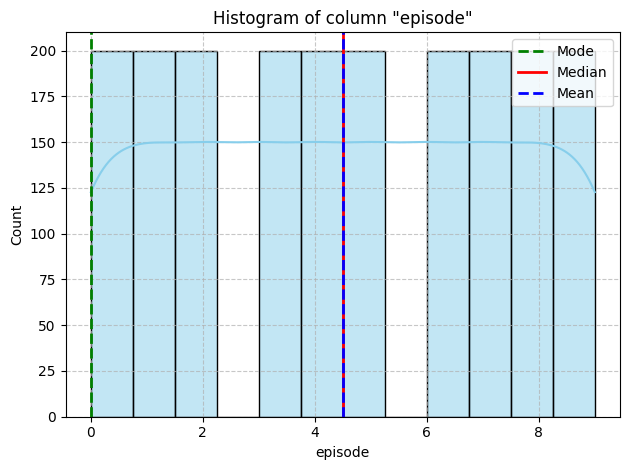

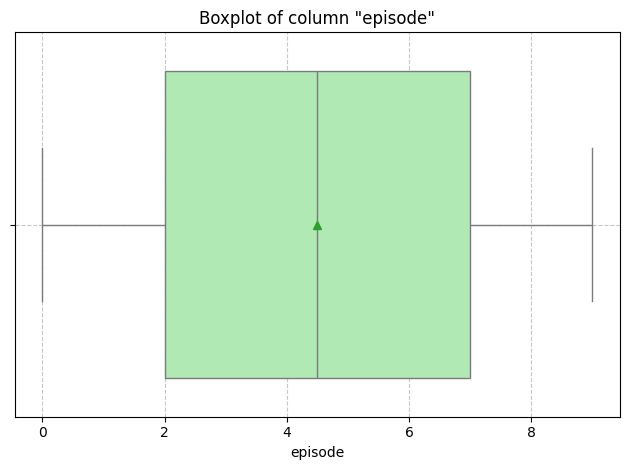

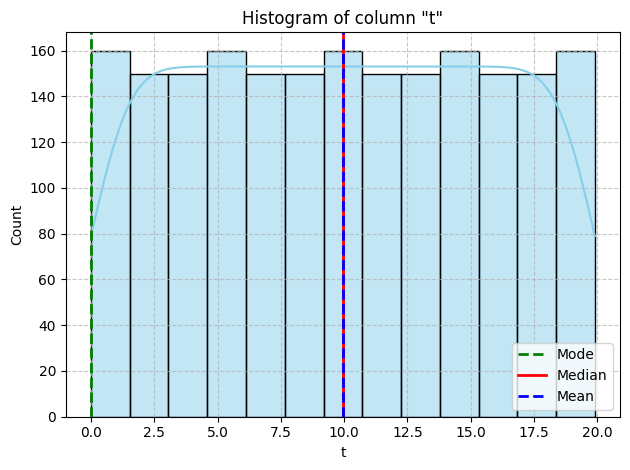

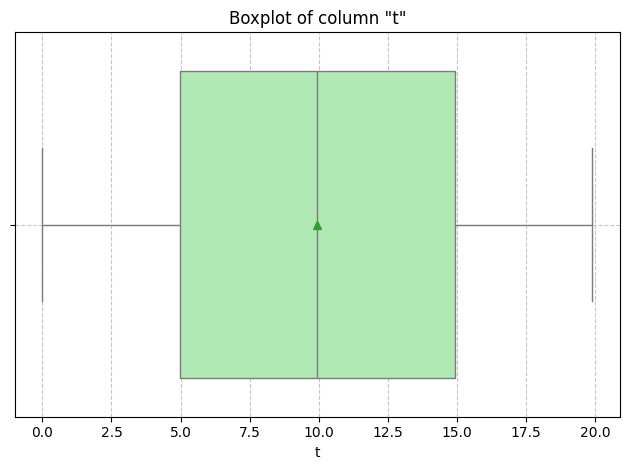

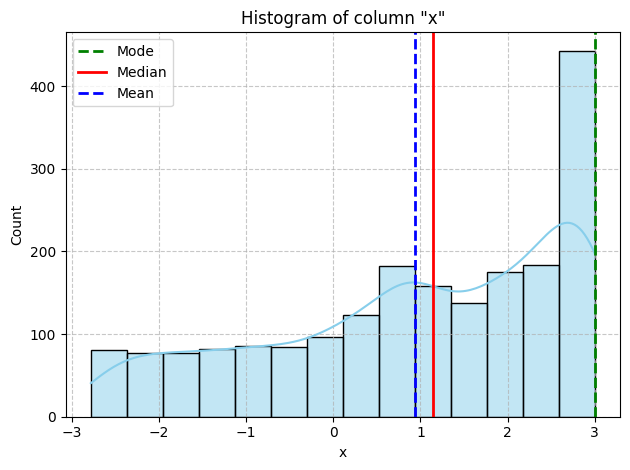

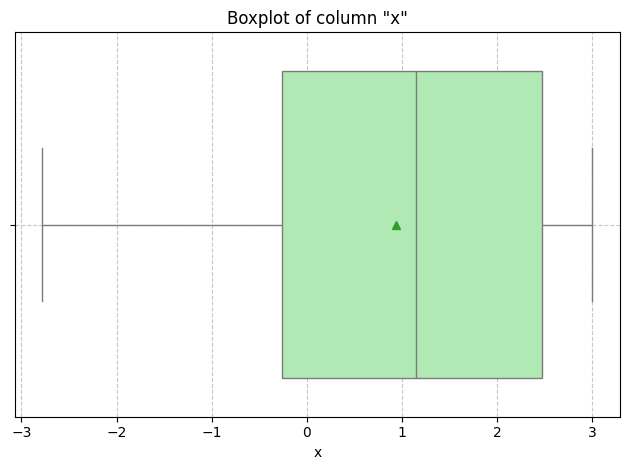

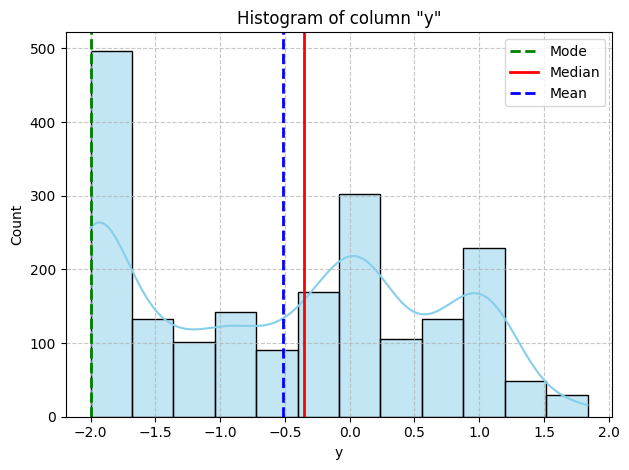

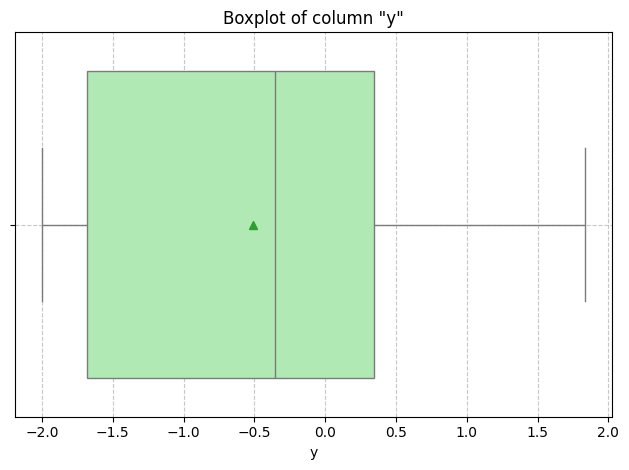

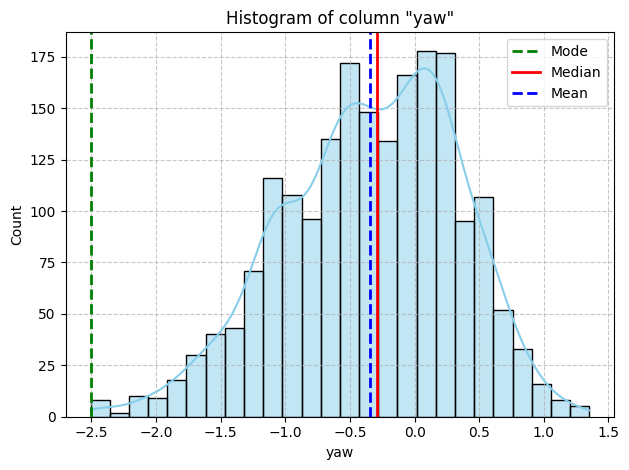

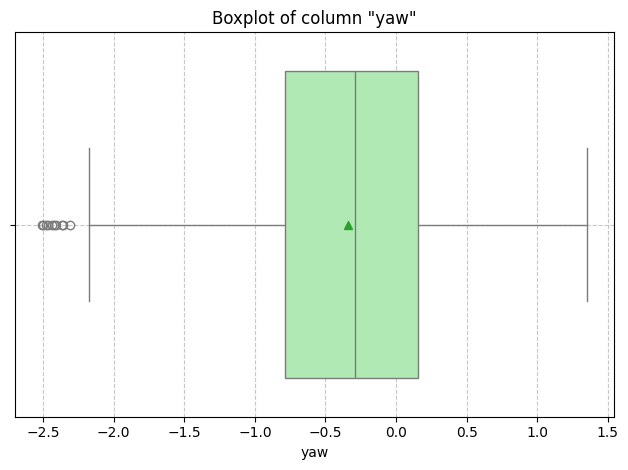

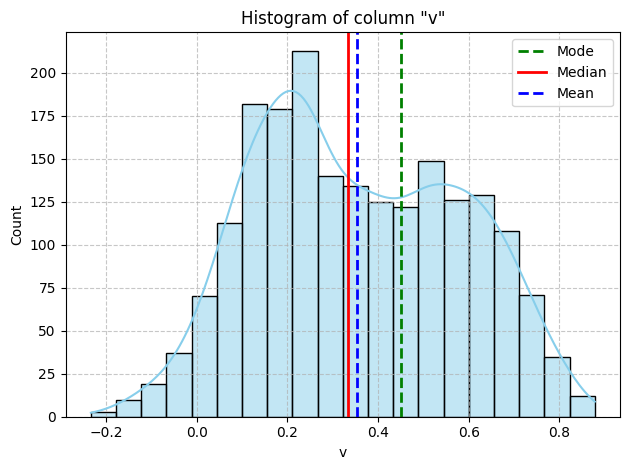

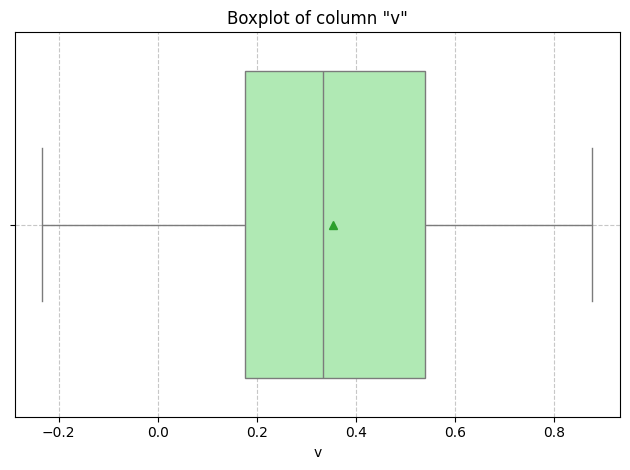

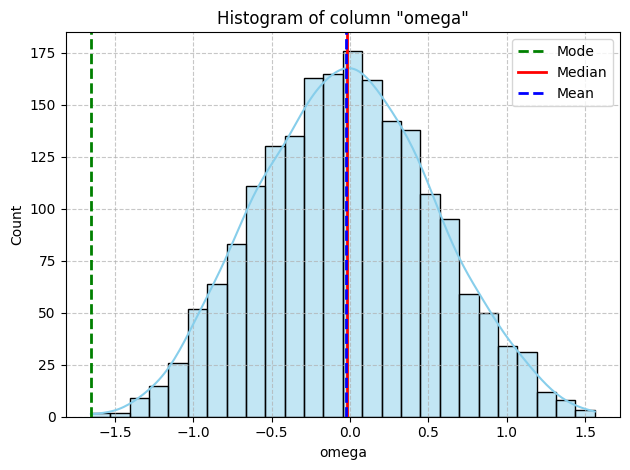

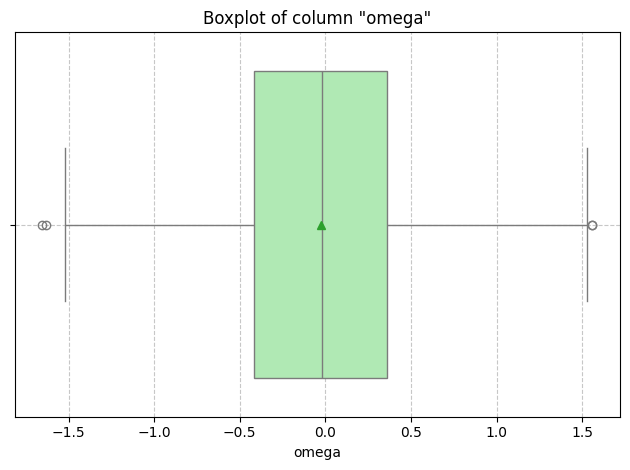

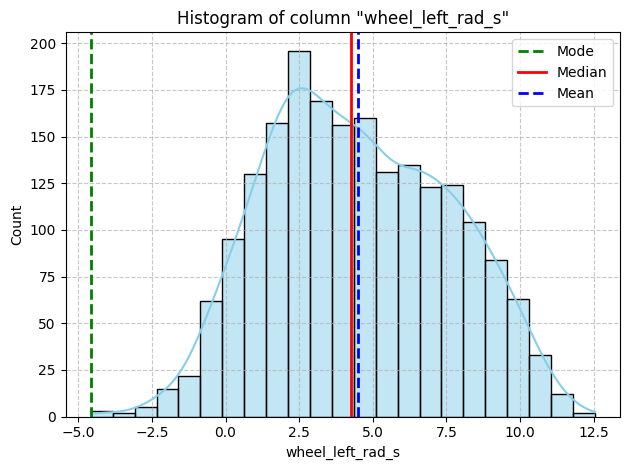

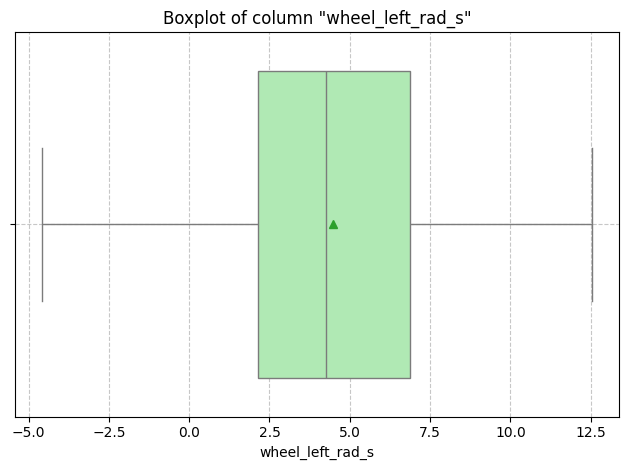

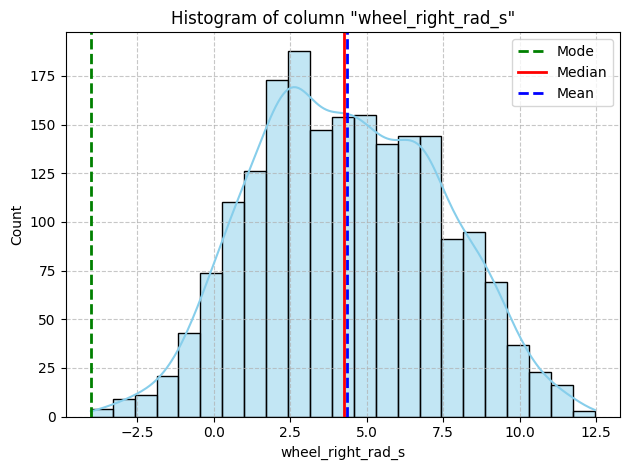

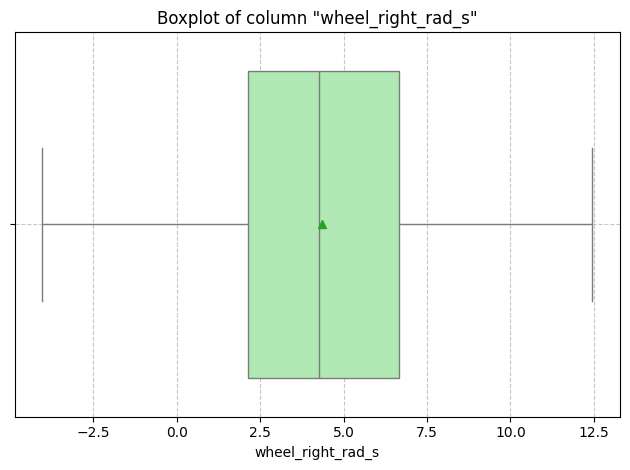

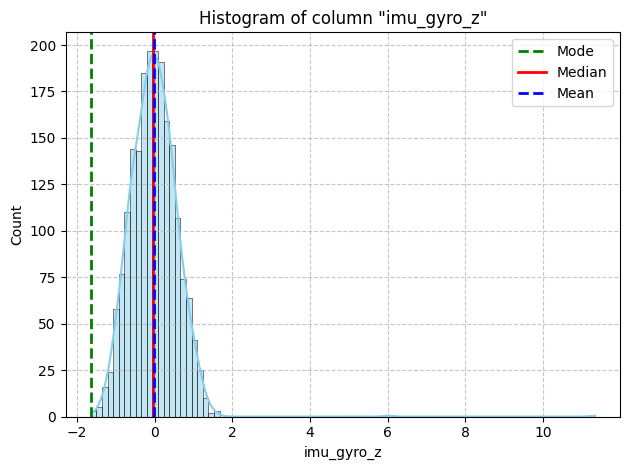

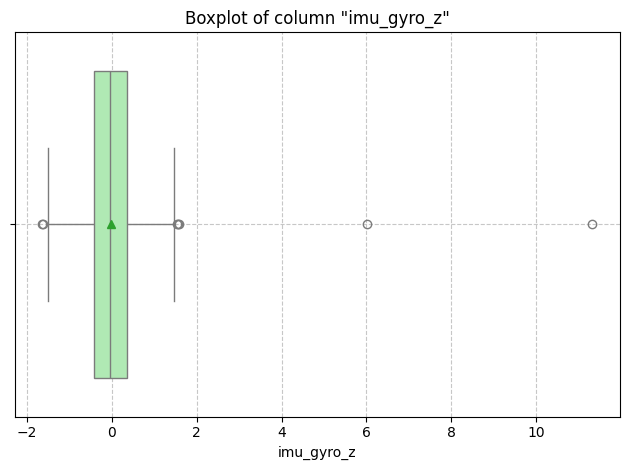

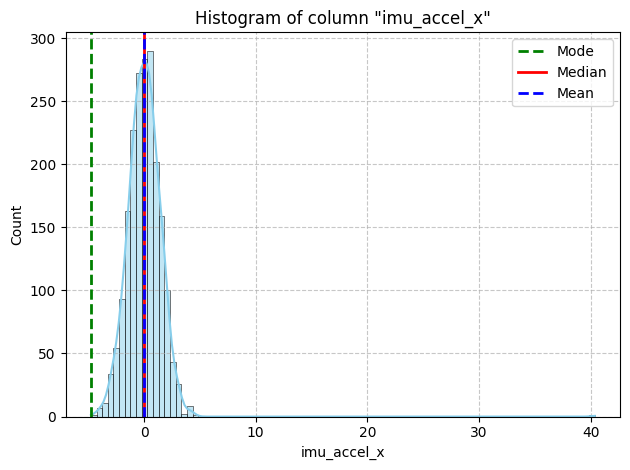

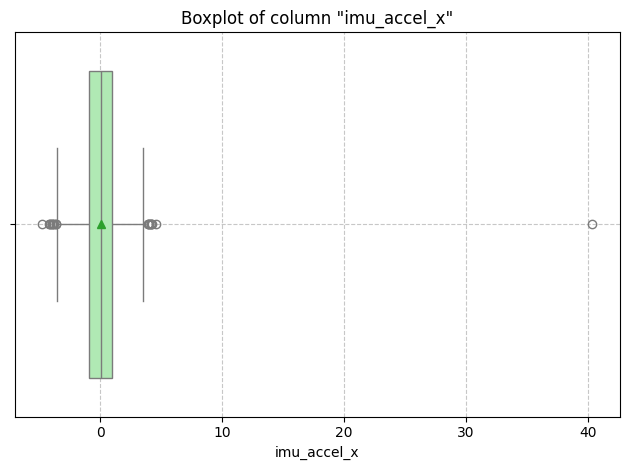

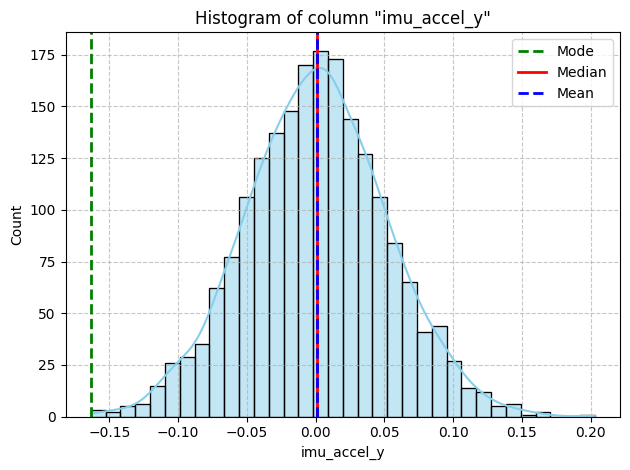

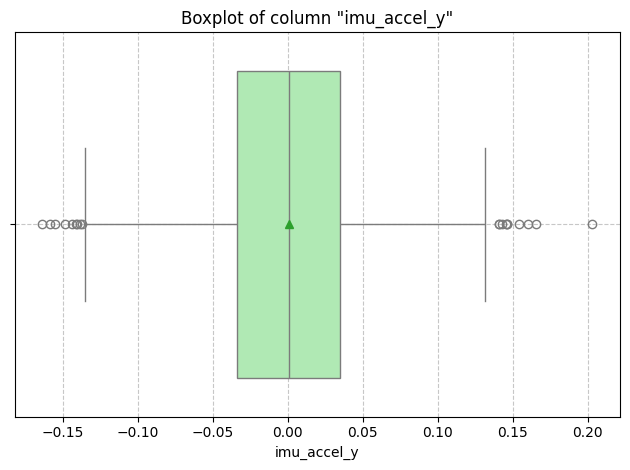

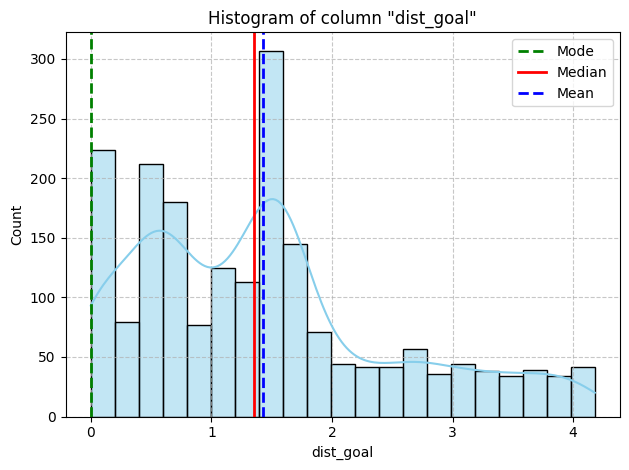

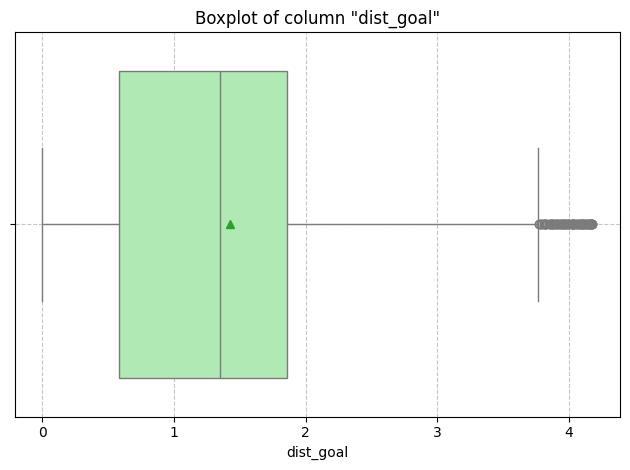

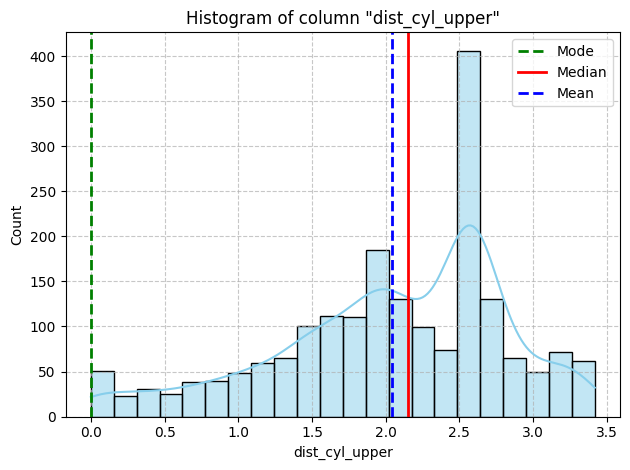

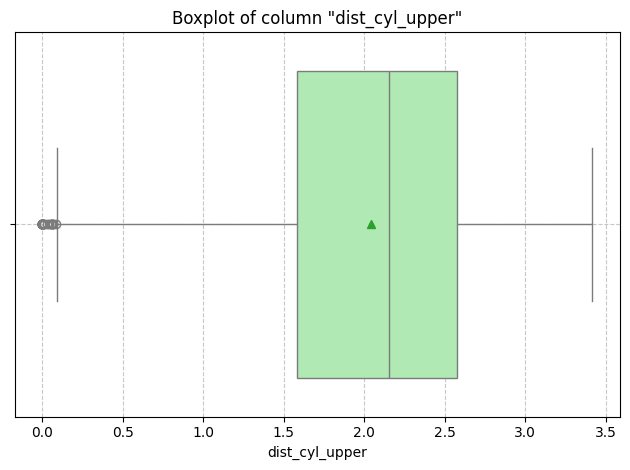

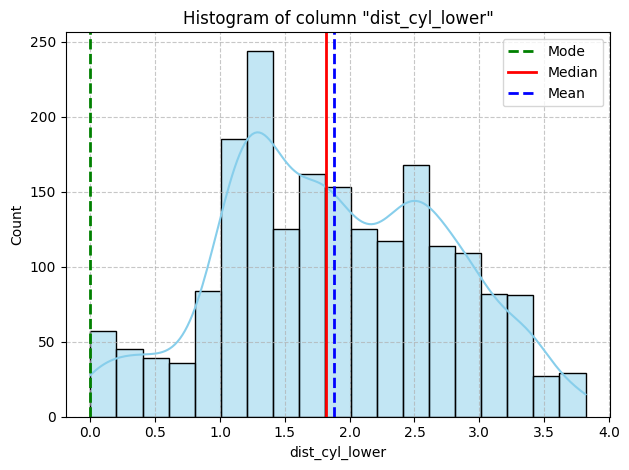

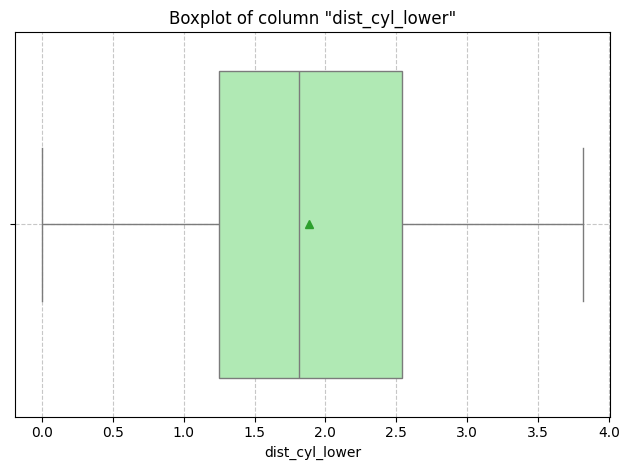

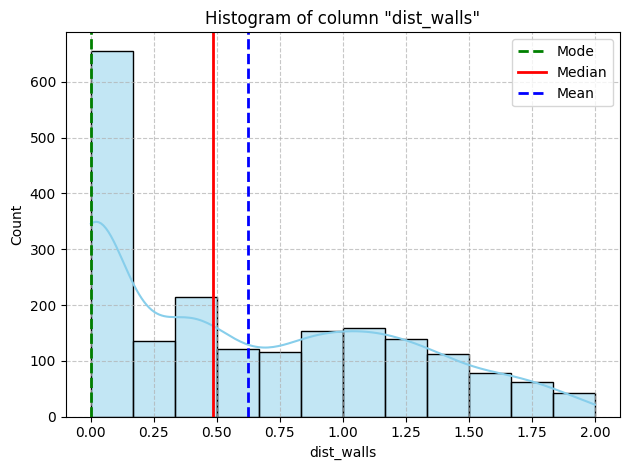

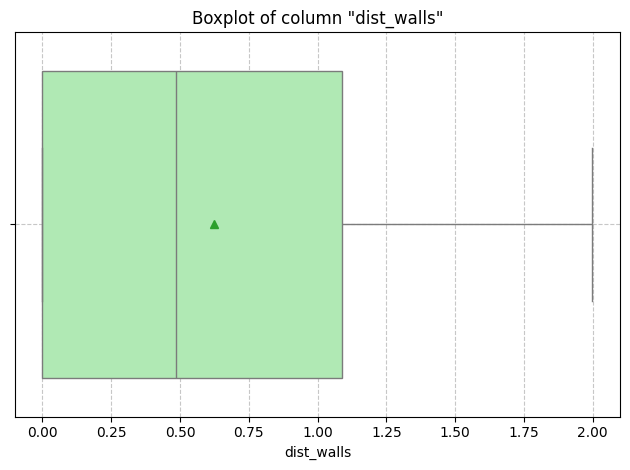

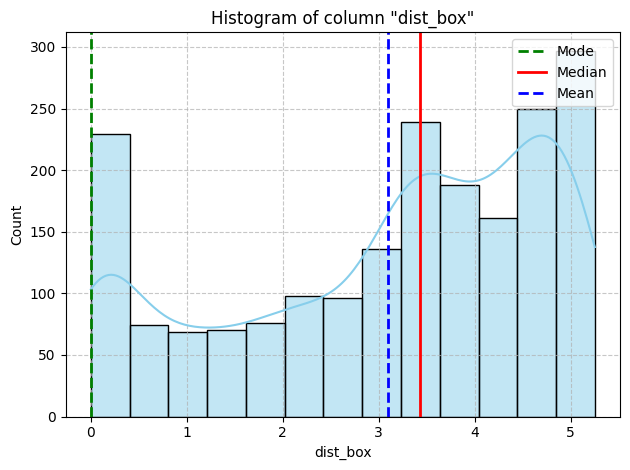

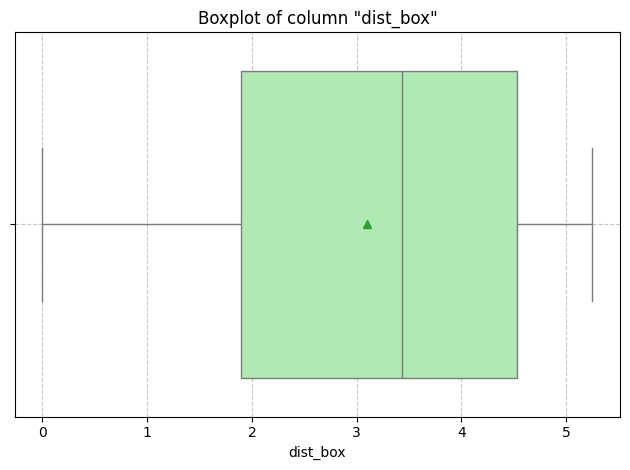

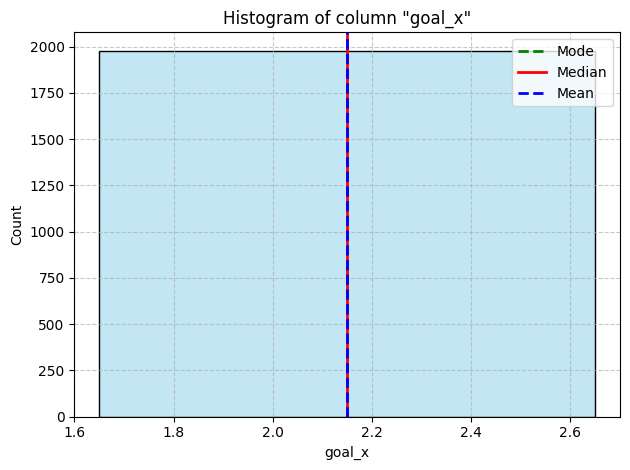

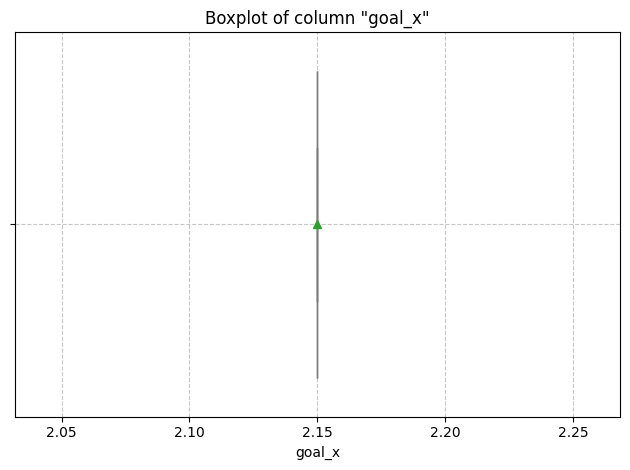

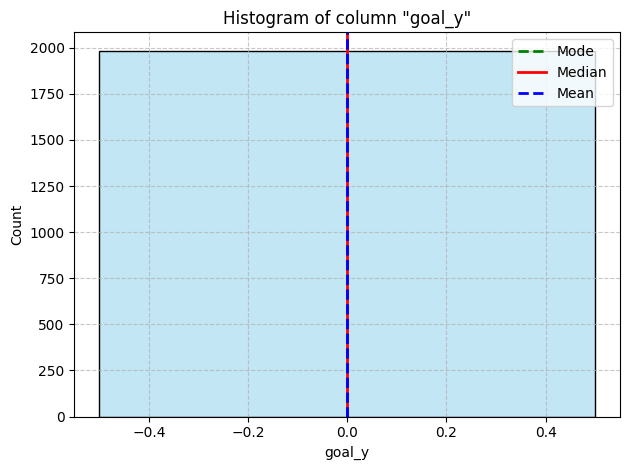

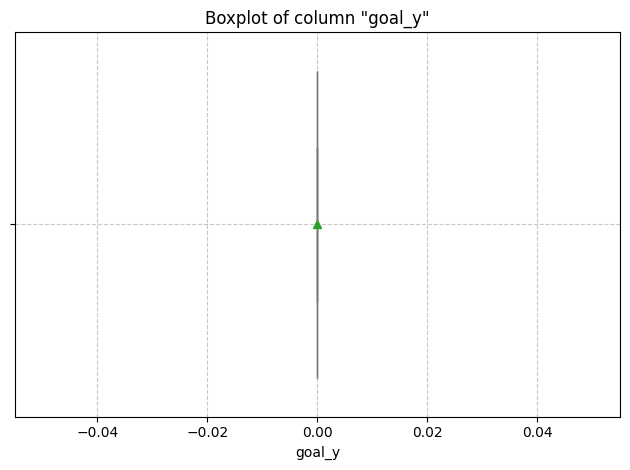

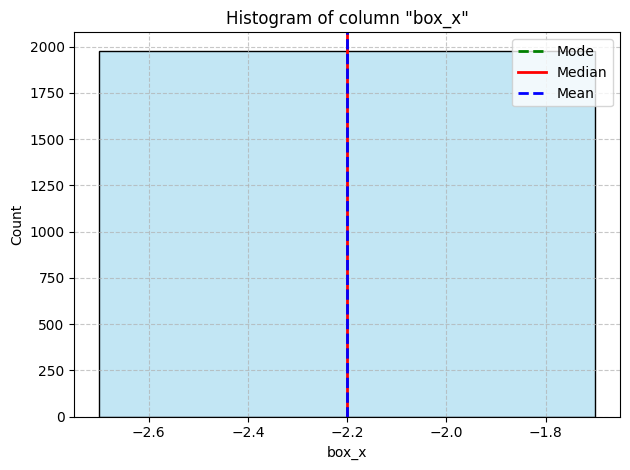

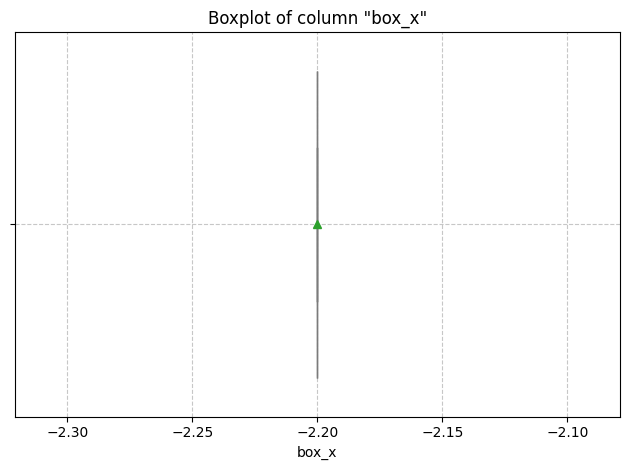

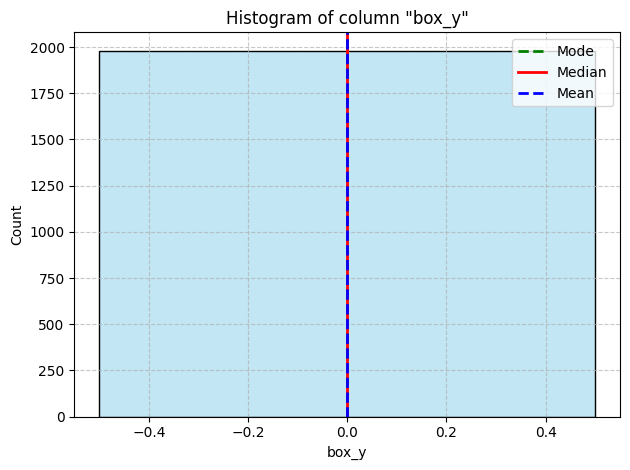

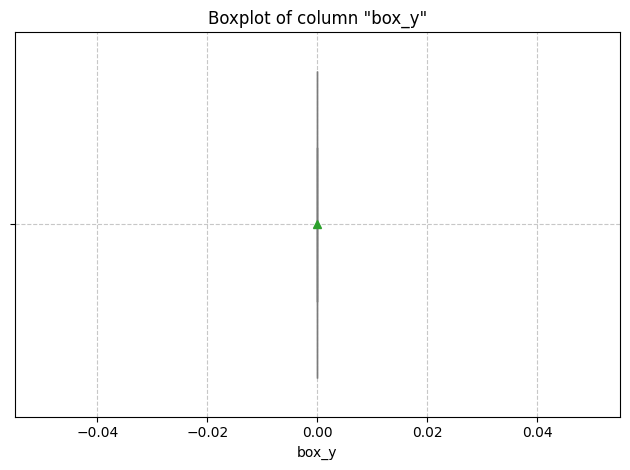

In [10]:
exclude_cols = {"in_goal", "contact_box", "collision_wall", "episode_success"}

for col in [c for c in df.columns if c not in exclude_cols]:
    print('\n')
    print_histogram_per_column(df=df, column_name=col)
    print_boxplot_per_column(df=df, column_name=col)

As we previously stated, outliers are mostly concentrated in **IMU readings**, reflecting sensor spikes. Those are not errors but rather part of the stochastic nature of the simulation. Outliers (sensor spikes, sudden velocity changes) are kept here because they are part of the robot’s natural dynamics and need to be visible to the agent. Missing values are minimal and are left unhandled at this stage, since their occurrence rate may differ across runs.

In the same line, coordinates and distances behave as expected within the arena limits. For example:

- **x, y, yaw**: represent spatial coordinates inside the bounded arena. Those distributions are relatively balanced, though skewness values show slight asymmetries depending on how the robot explored the area.
- **dist_goal, dist_cyl_upper, dist_cyl_lower, dist_walls, dist_box**: the histograms show that most values are clustered between 0.5 and 2.0 m and fewer at higher distances. Negative skewness indicates that the robot spends most of its time far from obstacles but occasionally gets very close.

Overall, the **dist_goal** variable stands out as the most informative for task performance, since it directly encodes progress toward the objective.

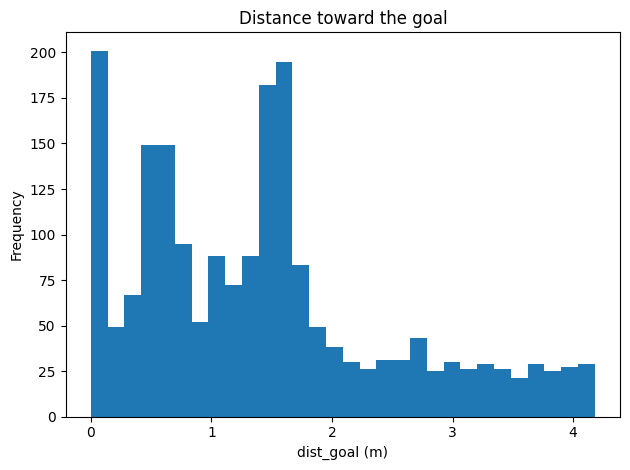

In [11]:
# Histogram of "dist_goal"
plt.figure()
df["dist_goal"].dropna().plot(kind="hist", bins=30, title="Distance toward the goal")
plt.xlabel("dist_goal (m)")
plt.tight_layout()
plt.show()

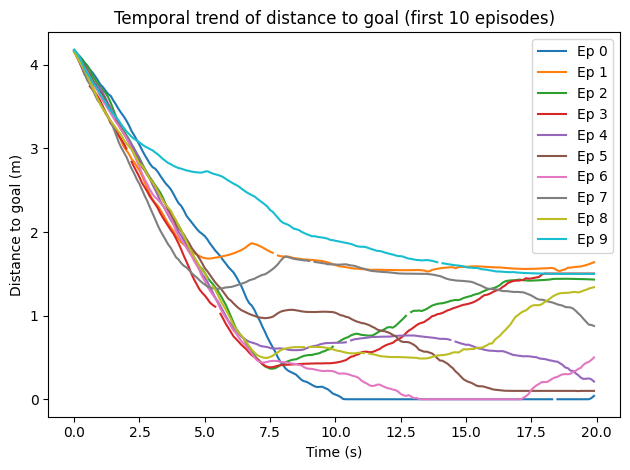

In [12]:
# Temporal trend of "dist_goal" per "episode"
plt.figure()
for ep in df["episode"].unique()[:10]:
    subset = df[df["episode"] == ep]
    plt.plot(subset["t"], subset["dist_goal"], label=f"Ep {ep}")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Distance to goal (m)")
plt.title("Temporal trend of distance to goal (first 10 episodes)")
plt.tight_layout()
plt.show()

As we previously stated, most values are concentrated between **0.5 and 2.0 m**, indicating that the robot frequently operates at intermediate distances from the goal region. The skewness is slightly positive, with a log right tail representing episodes where the robot remains far from the target. The presence of a clear mode near zero reflects successful approaches, even though they occur less often.

In the same note, the temporal trajectories across the first 10 episodes show a clear downward trend in several runs, confirming that the robot successfully approaches the goal region in certain cases. Many episodes flatten out above 1.0 m or even increase again after partial progress, reflecting collisions or inefficient navigation that prevent consistent goal achievement.

Let's transform **in_goal**, **contact_box**,  **collision_wall**, and **episode_success** variables to categorical to further analyze them.

## Categorical Analysis

In [13]:
# Cast boolean-like columns to categorical

bool_cols = ["in_goal", "contact_box", "collision_wall", "episode_success"]

# Cast to pandas 'category' dtype (keeps 0/1 values as categories; preserves NaN if present)
for c in bool_cols:
    df[c] = df[c].astype("Int64").astype("category")

df

,episode,t,x,y,yaw,v,omega,wheel_left_rad_s,wheel_right_rad_s,imu_gyro_z,...,dist_cyl_lower,dist_walls,dist_box,contact_box,collision_wall,goal_x,goal_y,box_x,box_y,episode_success
0,0,0.0,-2.769985,0.000000,0.014937,0.300154,0.149373,3.245511,4.072032,0.143890,...,2.537260,2.300154e-01,0.319985,0,0,2.15,0.0,-2.2,0.0,1
1,0,0.1,-2.732737,0.000556,0.046898,0.372518,0.319607,3.991428,5.454720,0.326745,...,2.501762,2.672630e-01,0.282737,0,0,2.15,0.0,-2.2,0.0,1
2,0,0.2,-2.707904,0.001722,-0.001598,0.248606,-0.484965,4.162068,2.138684,-0.521800,...,2.478355,2.920962e-01,0.257904,NaN,0,2.15,0.0,-2.2,0.0,1
3,0,0.3,-2.672207,0.001665,-0.028272,0.356966,-0.266733,4.816512,3.750175,-0.264467,...,2.444238,3.277928e-01,0.222207,0,0,2.15,0.0,-2.2,0.0,1
4,0,0.4,-2.624784,0.000324,0.002611,0.474418,0.308828,5.306022,6.322172,0.297156,...,2.398595,3.752157e-01,0.174784,0,0,2.15,0.0,-2.2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9,19.5,1.632622,-1.999999,-0.539329,0.237024,-0.747470,4.190813,1.618835,-0.770139,...,1.857600,1.000000e-06,3.987189,0,1,2.15,0.0,-2.2,0.0,0
1996,9,19.6,1.654587,-1.999999,-0.630224,0.255984,-0.908948,5.176325,1.171203,-0.942938,...,1.875694,1.000000e-06,4.006937,0,1,2.15,0.0,-2.2,0.0,0
1997,9,19.7,1.659016,-1.999999,-0.728478,0.054819,-0.982535,2.796704,-1.450424,-0.995288,...,1.879351,1.000000e-06,4.010922,0,1,2.15,0.0,-2.2,0.0,0
1998,9,19.8,1.674628,-1.999999,-0.712384,0.209223,0.160937,1.928130,3.229645,0.195623,...,1.892266,1.000000e-06,4.024975,0,1,2.15,0.0,-2.2,0.0,0


In [14]:
# ********************* PART 1: Print tables with unique counts per column *********************

cat_like_cols = df.select_dtypes(include=["category", "object"]).columns

for column in cat_like_cols:
    counts = df[column].value_counts(dropna=False).reset_index()
    counts.columns = [column, "Counts:"]
    
    counts[column] = counts[column].astype(object)
    counts[column] = counts[column].where(counts[column].notna(), "NaN")
    counts[column] = counts[column].astype(str)

    print(tabulate(counts, headers="keys", tablefmt="psql", showindex=False))

+-----------+-----------+
|   in_goal |   Counts: |
|-----------+-----------|
|         0 |      1846 |
|         1 |       132 |
|       nan |        22 |
+-----------+-----------+
+---------------+-----------+
|   contact_box |   Counts: |
|---------------+-----------|
|             0 |      1871 |
|             1 |        99 |
|           nan |        30 |
+---------------+-----------+
+------------------+-----------+
|   collision_wall |   Counts: |
|------------------+-----------|
|                0 |      1473 |
|                1 |       503 |
|              nan |        24 |
+------------------+-----------+
+-------------------+-----------+
|   episode_success |   Counts: |
|-------------------+-----------|
|                 0 |      1600 |
|                 1 |       400 |
+-------------------+-----------+


**High cardinality** is not present in this dataset since categorical variables have only 2–3 unique values.

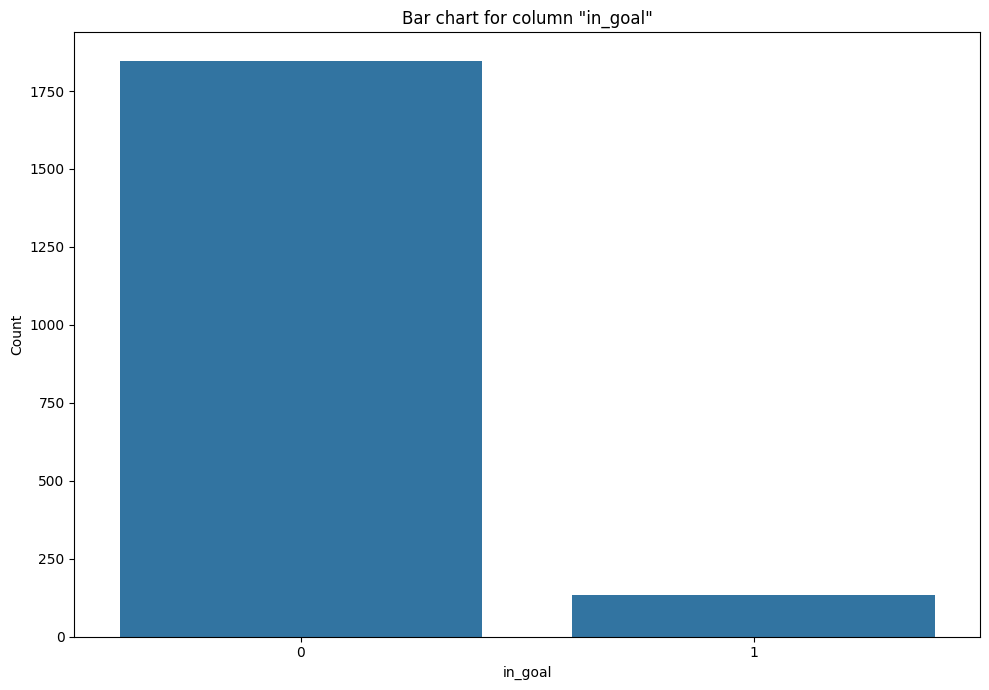

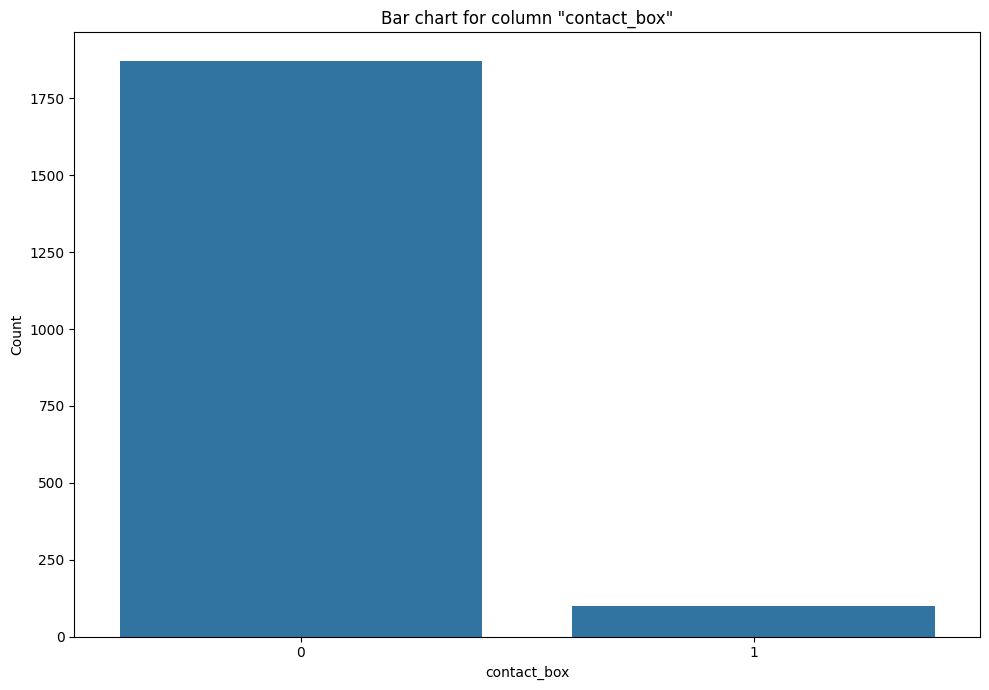

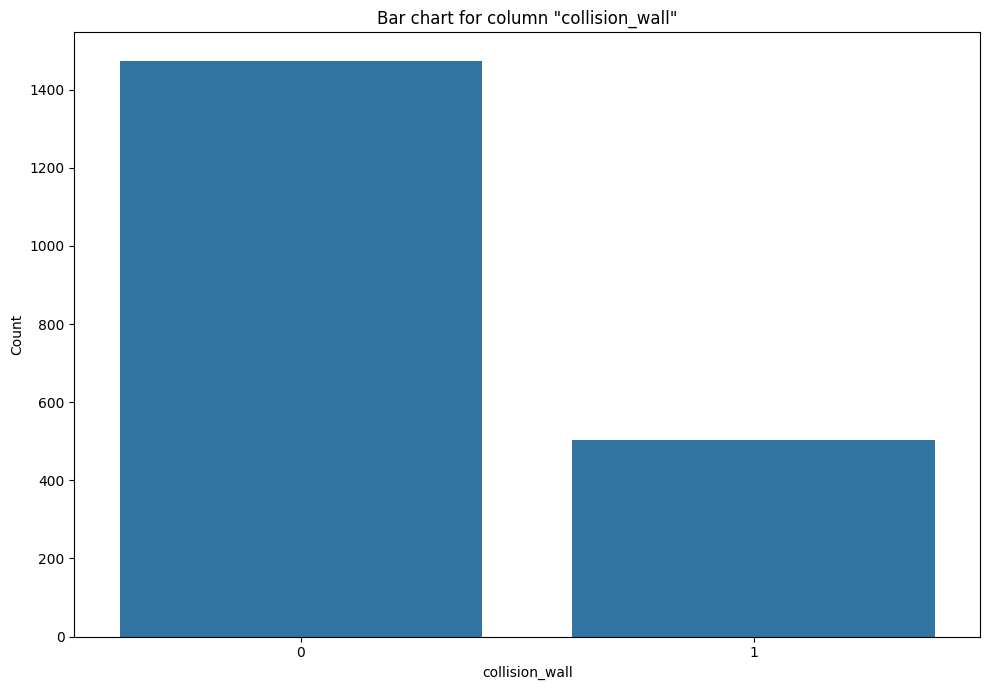

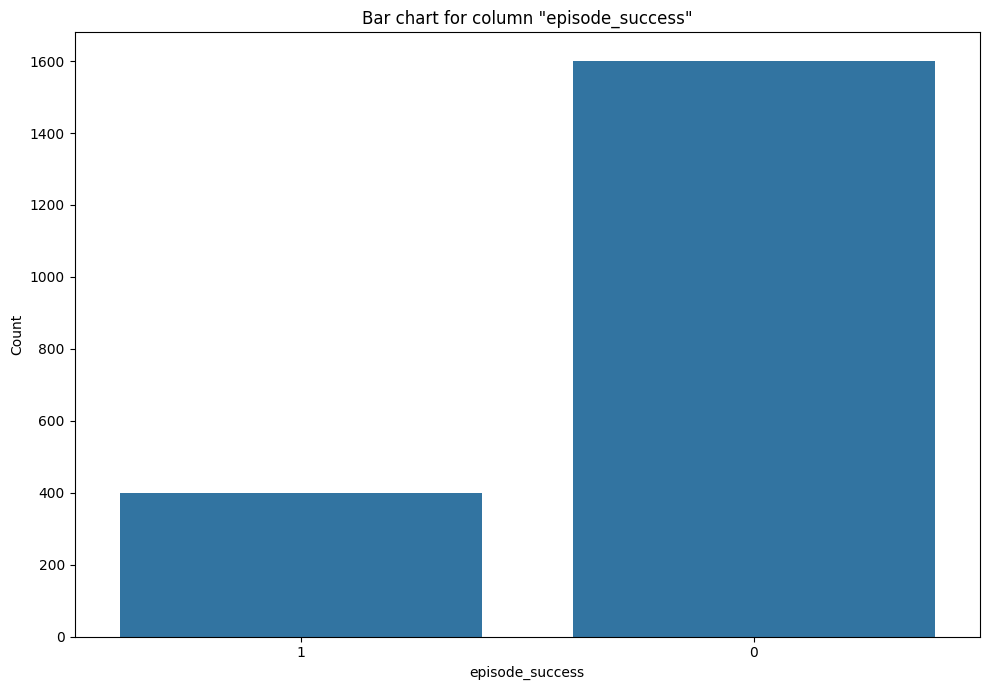

In [15]:
# ********************************** PART 2: Print bar graphs **********************************

for column in cat_like_cols:
    plt.figure(figsize=(10, 7))
    # Convert to string for cleaner axis labels (keeps NaN as 'nan')
    sns.countplot(x=df[column].astype(str), data=df)
    plt.title(f'Bar chart for column "{column}"')
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

The categorical analysis confirms that the dataset is imbalanced across the event-related variables. For example, in the case of the **in_goal** variable, only ~7% of observations correspond to the robot being inside the goal region, reflecting the relative difficulty of reaching the target. Also, this shows that the interactions with the pushable box are rare events, ending in small successful completions of the episodes. These distributions emphasize that the environment produces sparse positive outcomes and frequent negative events, which is consistent with a challenging RL scenario. This imbalance is what will guide the design of the reward shaping and state representation for the training of the A2C and PPO models.

## Correlation Analysis

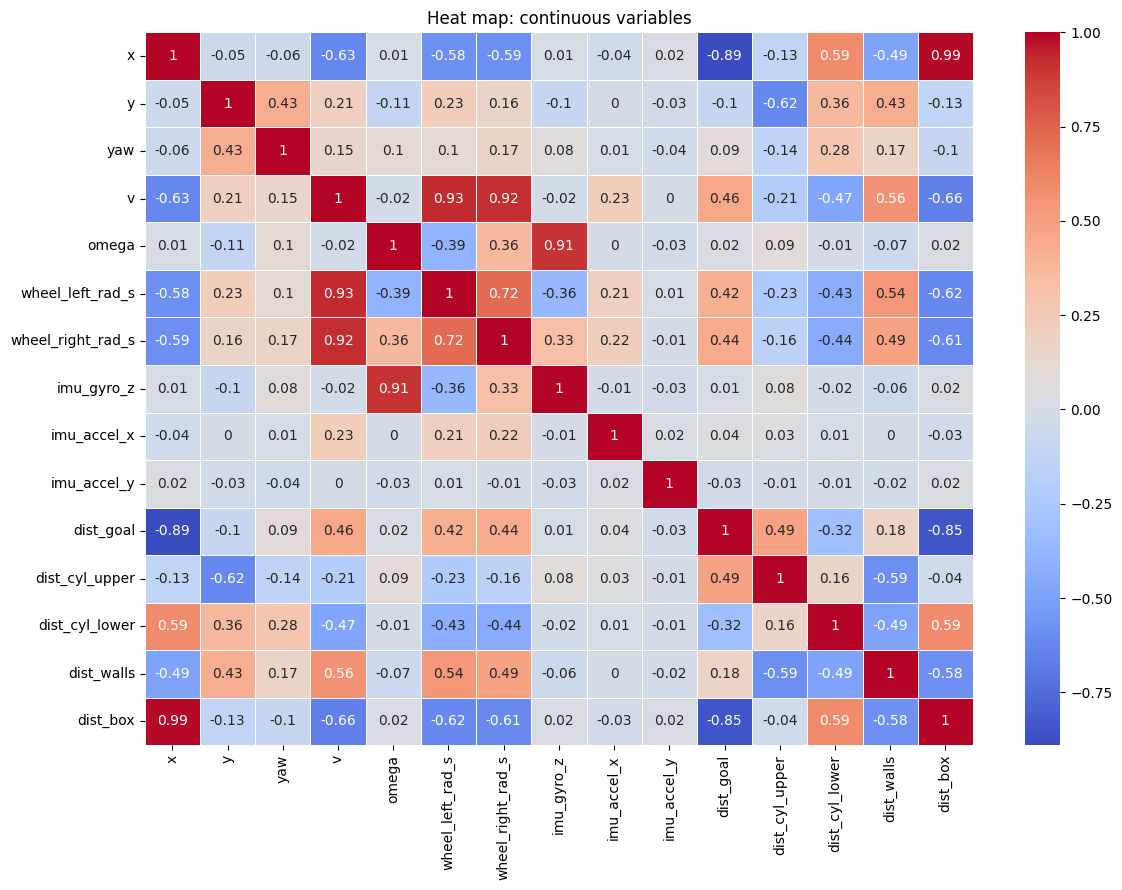

In [16]:
# Let's use the continuous variables instead, to avoid mixing:
# identifiers (episode),
# time (t, which drives many variables by construction),
# constants (goal_x, goal_y, box_x, box_y) that don’t carry signal.
    
cont_cols = [
    "x", "y", "yaw",
    "v", "omega",
    "wheel_left_rad_s", "wheel_right_rad_s",
    "imu_gyro_z", "imu_accel_x", "imu_accel_y",
    "dist_goal", "dist_cyl_upper", "dist_cyl_lower", "dist_walls", "dist_box",
]
cont_cols = [c for c in cont_cols if c in df.columns]

# Pearson correlation among continuous variables
corr_cont = df[cont_cols].corr(method="pearson")

plt.figure(figsize=(12, 9))
sns.heatmap(corr_cont.round(2), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heat map: continuous variables")
plt.tight_layout()
plt.show()

The correlation matrix reveals that:

- Strong positive correlations between **v** and wheel angular velocities validate the differential-drive model.
- **v** and **dist_goal** are negatively correlated, confirming that higher speeds tend to reduce distance to the target.
- **x** and **dist_box** have a higher correlation since the box position is fixed on the x-axis.
- The variables related to the IMU sensor show moderate correlations with velocity/encoders.

Let's visualize three key relationships:

- `v` vs `episode_success`
- `x` vs `dist_goal`
- `v` vs `dist_goal`

## Bivariate Analysis

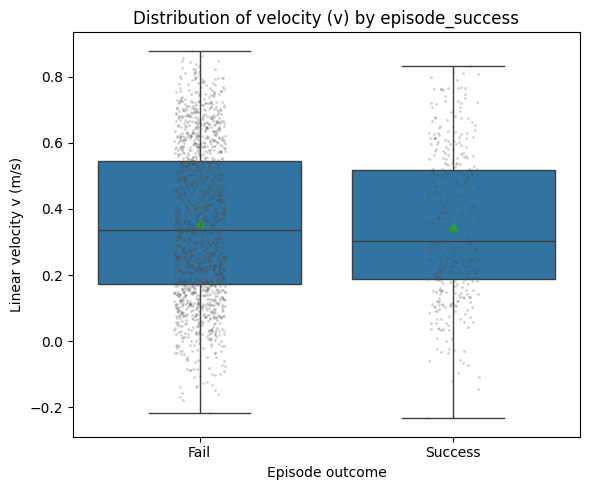

In [17]:
# Case 1: 'v' vs 'episode_success'

df_sub = df[["v","episode_success"]].dropna().copy()
df_sub["episode_success"] = df_sub["episode_success"].map({0:"Fail", 1:"Success"})
plt.figure(figsize=(6,5))
sns.boxplot(x="episode_success", y="v", data=df_sub, showmeans=True)
sns.stripplot(x="episode_success", y="v", data=df_sub, size=2, alpha=0.25, color="0.3")
plt.title("Distribution of velocity (v) by episode_success")
plt.xlabel("Episode outcome")
plt.ylabel("Linear velocity v (m/s)")
plt.tight_layout()
plt.show()

We observe that the median velocity is very similar between both groups, indicating that the robot typically operates in the same velocity range regardless of the outcome. Another thing to point out is that the failures include more extreme low values (less than 0 m/s), reflecting moments where the robot stalled. Overall, the pattern indicates that success does not require higher speeds; it requires consistency in maintaining forward movement without reversing.

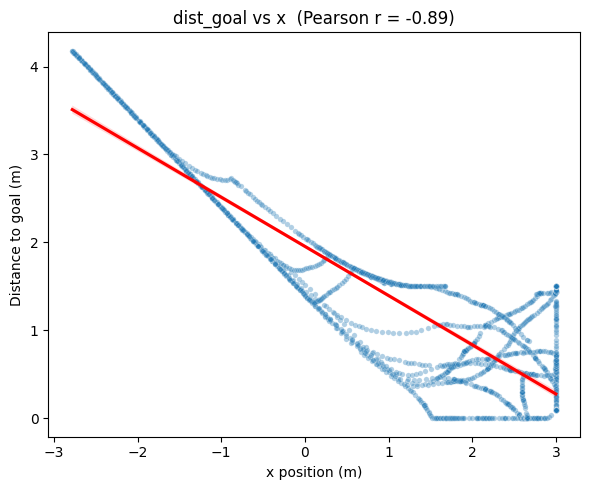

In [18]:
# Case 2: 'x' vs 'dist_goal'

pair1 = df[["x", "dist_goal"]].dropna().copy()
r1 = pair1.corr(method="pearson").iloc[0, 1]
plt.figure(figsize=(6,5))
sns.scatterplot(x="x", y="dist_goal", data=pair1, alpha=0.35, s=15)
sns.regplot(x="x", y="dist_goal", data=pair1, scatter=False, color="red")
plt.title(f"dist_goal vs x  (Pearson r = {r1:.2f})")
plt.xlabel("x position (m)")
plt.ylabel("Distance to goal (m)")
plt.tight_layout()
plt.show()

We observe that as the robot's x position increases, the distance to the goal decreases almost linearly. In that sense, moving forward in x is the dominant dimension for reaching the goal. However, the robot sometimes deviates due to interactions with obstacles, meaning that the robot does not align perfectly with the goal region in most cases. As a result, the robot may reach the target only in certain episodes, and often approaches it closely without fully entering the goal region.

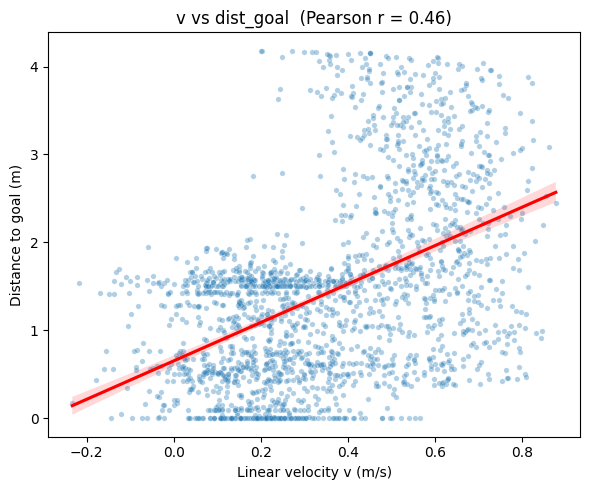

In [19]:
# Case 3: 'v' vs 'dist_goal'

pair2 = df[["v", "dist_goal"]].dropna().copy()
r2 = pair2.corr(method="pearson").iloc[0, 1]
plt.figure(figsize=(6,5))
sns.scatterplot(x="v", y="dist_goal", data=pair2, alpha=0.35, s=15)
sns.regplot(x="v", y="dist_goal", data=pair2, scatter=False, color="red")
plt.title(f"v vs dist_goal  (Pearson r = {r2:.2f})")
plt.xlabel("Linear velocity v (m/s)")
plt.ylabel("Distance to goal (m)")
plt.tight_layout()
plt.show()

We observe a positive correlation between the linear velocity (v) and its distance to the goal. This suggests that higher velocities tend to occur when the robot is still far from the target, while lower velocities are more common closer to the goal region. This indicates that successful approaches involve the robot slowing down as it nears the goal. However, the dispersion of points indicates that episodes with similar speeds may result in very different distances, showing that velocity alone is not a reliable predictor of progress.

## Class Balance

In [20]:
# Since for our RL setup, the ultimate objective is whether the agent successfully reaches the 
# goal region or not, we are going to analyze this outcome with the "episode_success" variable

balance = df["episode_success"].value_counts().rename("count")
balance_pct = (df["episode_success"].value_counts(normalize=True)*100).rename("pct")
display(pd.concat([balance, balance_pct], axis=1))

,count,pct
episode_success,,
0,1600,80.0
1,400,20.0


The distribution of the target variable shows that at least 80% of the episodes ended in failure, with only 20% in success. The imbalance highlights that the task is relatively challenging for the agent. From an RL perspective, this is expected during early-stage simulations, since exploration dominates and optimal strategies are not yet established. For future training, the RL signals will be refined to improve this success rate.

# Conclusion <a class="anchor" id="conclusion" ></a>

In conclusion, the EDA has shown that:

- The percentage of missing values is low, but this suggests that there are issues with the artifacts generated from the simulation.
- The robot frequently operates at intermediate distances to the goal. The outliers identified in IMU readings and velocities reflect unusual events such as collisions or stalls.
- The categorical variables reflect that most episodes failed to reach the goal, and box or wall interactions occurred in a minority of cases.
- The skewness shown in several variables is consistent with the task difficulty, suggesting that reward shaping and state normalization are relevant for RL training.
- The bivariate analysis reinforces that success is associated with shorter distances to the goal and more consistent navigation.
- The analysis of the class balance provides a useful baseline to evaluate progress during RL training.

The EDA confirms that the dataset captures the essential dynamics of the simulated tasks, guiding the definition of the state representation and the evaluation of the A2C and PPO algorithms.

# References <a class="anchor" id="references" ></a>

[1] Tsinghua University, “History,” Tsinghua University. https://www.tsinghua.edu.cn/en/About/History.htm 

[2]Tsinghua University, “School of Vehicle and Mobility,” THU - Graduate Admissions. https://yz.tsinghua.edu.cn/en/info/1014/1115.htm 

[3] Instituto Nacional de Estadística y Geografía (INEGI), “Sistema de Clasificación Industrial de América del Norte, México SCIAN 2023,” INEGI, Jul. 28, 2023. https://www.inegi.org.mx/scian/ 

[4] Open Robotics, “Features and Benefits of GAZEBO SIM,” Gazebo. https://gazebosim.org/home 

[5] Open Robotics, “Getting started with ROS 2,” ROS 2 Documentation: Rolling Documentation. https://docs.ros.org/en/rolling/index.html 

[6] D. Ge and H. Ji, “Efficient Training in Multi-Agent Reinforcement Learning: A Communication-Free Framework for the Box-Pushing problem,” arXiv.org, Nov. 19, 2024. https://arxiv.org/abs/2411.12246 

[7] K. Kondo, C. T. Tewari, A. Tagliabue, J. Tordesillas, P. C. Lusk, and J. P. How, “PRIMER: Perception-Aware robust learning-based multiagent trajectory Planner,” arXiv (Cornell University), Jun. 2024, doi: 10.13140/rg.2.2.14435.57124. 

[8] H. Farivarnejad and S. Berman, “Multirobot control Strategies for collective transport,” Annual Review of Control Robotics and Autonomous Systems, vol. 5, no. 1, pp. 205–219, Nov. 2021, doi: 10.1146/annurev-control-042920-095844. 

[9] E. Elelimy, D. Szepesvari, M. White, and M. Bowling, “Rethinking the foundations for continual reinforcement learning,” arXiv.org, Apr. 10, 2025. https://arxiv.org/abs/2504.08161 
[10] C. Pan et al., “A survey of Continual Reinforcement learning,” arXiv.org, Jun. 27, 2025. https://arxiv.org/abs/2506.21872 

[11] M. Rahimi, S. Gibb, Y. Shen, and H. M. La, “A comparison of various approaches to reinforcement learning algorithms for multi-robot box pushing,” arXiv.org, Sep. 21, 2018. https://arxiv.org/abs/1809.08337 

[12] K. Javed and R. S. Sutton, “The Big World Hypothesis and its Ramifications for Artificial Intelligence,” OpenReview. https://openreview.net/forum?id=Sv7DazuCn8 

[13] S. Zhao, Mathematical foundations of reinforcement learning. 2025. doi: 10.1007/978-981-97-3944-8. 

[14] R. S. Sutton and A. G. Barto, Reinforcement learning: An Introduction. MIT Press, 1998. 

[15] S. E. Li, Reinforcement learning for sequential decision and optimal control. 2023. doi: 10.1007/978-981-19-7784-8. 

[16] J. Schulman, F. Wolski, P. Dhariwal, A. Radford, and O. Klimov, “Proximal Policy optimization Algorithms,” arXiv.org, Jul. 20, 2017. https://arxiv.org/abs/1707.06347